dict_keys(['RMS_Hal_edge_state_750_1500_k_site_82.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large', 'RMS_Hal_edge_state_750_1500_k_site_85.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large', 'RMS_Hal_edge_state_750_1500_k_site_88.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])
dict_keys(['b

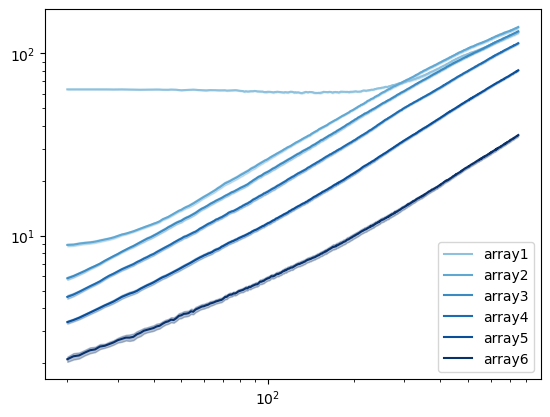

[array([ 63.58192059,  63.58212238,  63.58192571,  63.57932909,
        63.57501858,  63.56921157,  63.55863218,  63.54283395,
        63.53084431,  63.51937265,  63.52023029,  63.50570561,
        63.50103635,  63.51041966,  63.52264817,  63.49659028,
        63.47634547,  63.43493945,  63.4339683 ,  63.38877259,
        63.39400764,  63.38031074,  63.420462  ,  63.42926502,
        63.40805975,  63.36628392,  63.39697097,  63.42933246,
        63.37549749,  63.31075769,  63.37449442,  63.39077894,
        63.32766476,  63.2232645 ,  63.16971311,  63.13123136,
        63.11102097,  63.1612642 ,  63.28445062,  63.23615509,
        63.28886954,  63.29228483,  63.26563967,  63.11439465,
        63.12546746,  63.07489886,  63.2661198 ,  63.21222239,
        63.1078134 ,  62.8524493 ,  62.69384331,  62.7866651 ,
        62.91691618,  63.04425871,  63.08864521,  63.17605137,
        63.08969441,  62.90426548,  62.82041065,  62.72890615,
        62.64513815,  62.59723842,  62.74389489,  62.8

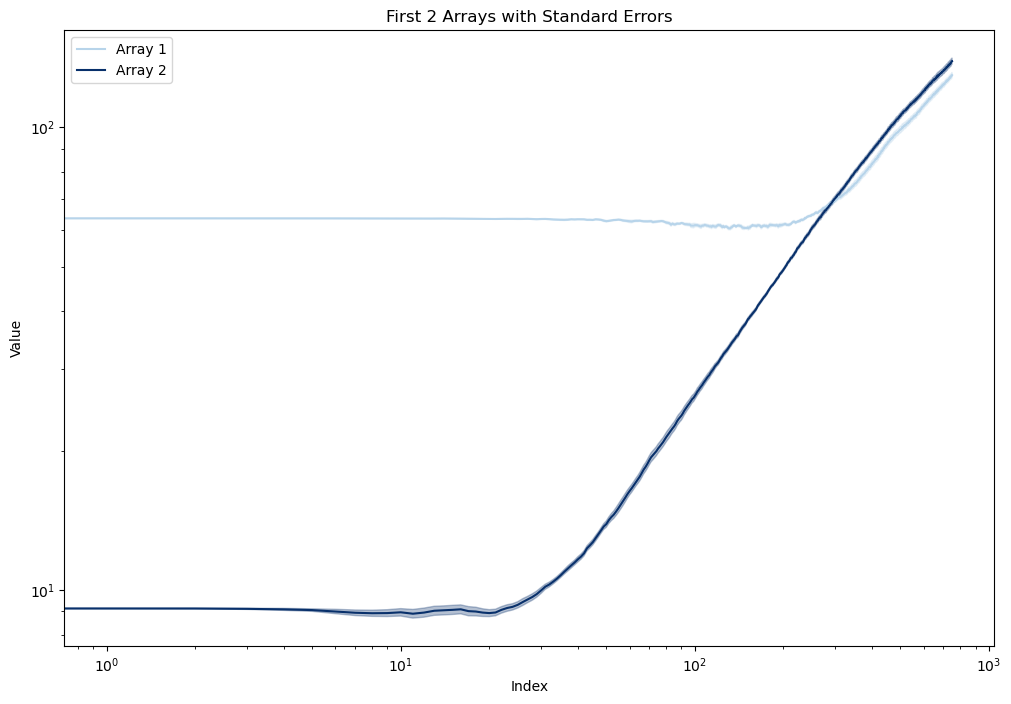

In [1]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_eigenfunc')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
for idx, site in enumerate(range(82, 100, 3), start=1):
    # Walk through the directory
    for root, dirs, files in os.walk(downloads_folder):
        # Filter out only the .txt files that match the pattern
        txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

        # Load each file and store it in the dictionary
        for txt_file in txt_files:
            file_path = os.path.join(root, txt_file)
            data = np.loadtxt(file_path)
            le_ana_arrays[txt_file] = data

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Initialize a dictionary to store the arrays from each directory
    le_ana_arrays = {}

    # Loop through directories b0 to b95
    for i in range(96):
        dir_path = os.path.join(downloads_folder, f'b{i}')
        le_ana_large_path = os.path.join(dir_path, f'RMS_Hal_edge_state_750_1500_k_site_{site}.txt')
        
        if os.path.exists(le_ana_large_path):
            le_ana_large = np.loadtxt(le_ana_large_path)
            le_ana_arrays[f'b{i}_large'] = le_ana_large

    # Print the keys of the dictionary to verify
    print(le_ana_arrays.keys())

    # Convert the dictionary values to a numpy array for easier manipulation
    plot_data = np.array(list(le_ana_arrays.values()))

    # Calculate the average and standard error
    globals()[f'array{idx}'] = np.mean(plot_data, axis=0)
    globals()[f'standard_error{idx}'] = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

    # Plot the arrays using the blue color schemes
    colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
    plt.loglog(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:], label=f'array{idx}', color=colors[idx % len(colors)])
    plt.fill_between(np.arange(20, len(globals()[f'array{idx}'])), globals()[f'array{idx}'][20:] - globals()[f'standard_error{idx}'][20:], globals()[f'array{idx}'][20:] + globals()[f'standard_error{idx}'][20:], alpha=0.3, color=colors[idx % len(colors)])

plt.legend()
plt.show()

# Define the arrays and their standard errors
arrays = [array1, array2]
standard_errors = [standard_error1, standard_error2]
print(arrays)
labels = [f'Array {i+1}' for i in range(len(arrays))]
print(labels)

# Plot the arrays with their standard errors
plt.figure(figsize=(12, 8))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(arrays)))
print(colors)

for i, (array, std_err, label) in enumerate(zip(arrays, standard_errors, labels)):
    plt.loglog(np.arange(len(array)), array, label=label, color=colors[i])
    plt.fill_between(np.arange(len(array)), array - std_err, array + std_err, alpha=0.3, color=colors[i])

plt.title('First 2 Arrays with Standard Errors')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

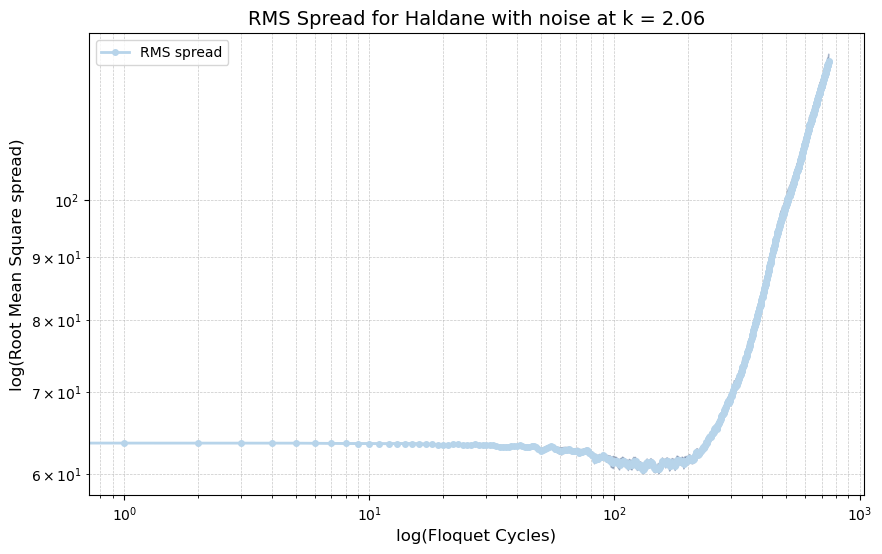

In [2]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array1)), array1, label="RMS spread", color=colors[0], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array1)), array1 - standard_error1, array1 + standard_error1, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS Spread for Haldane with noise at k = 2.06', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Root Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

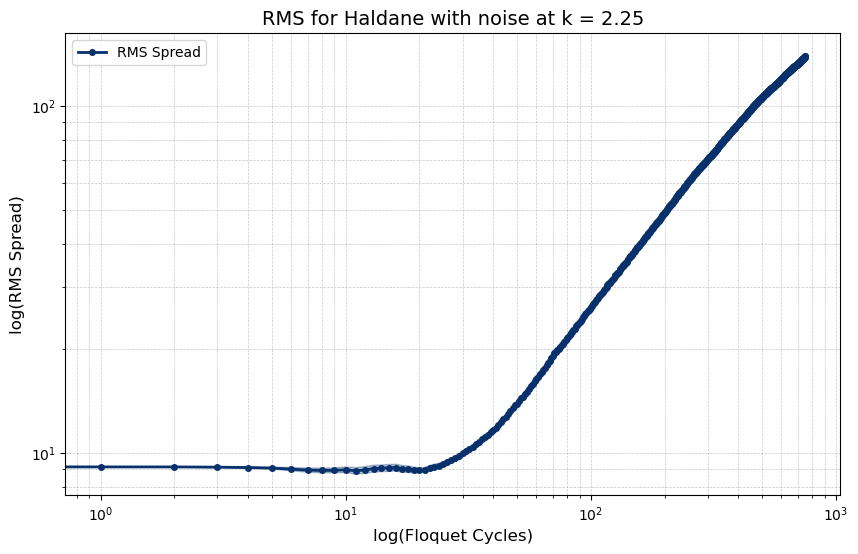

In [3]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array2)), array2, label="RMS Spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array2)), array2 - standard_error2, array2 + standard_error2, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 2.25', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

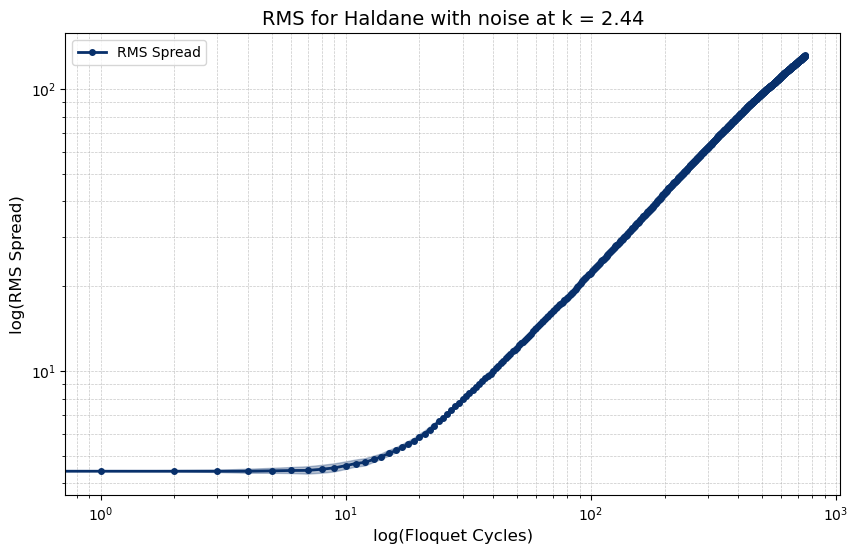

In [4]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array3)), array3, label="RMS Spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array3)), array3 - standard_error3, array3 + standard_error3, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

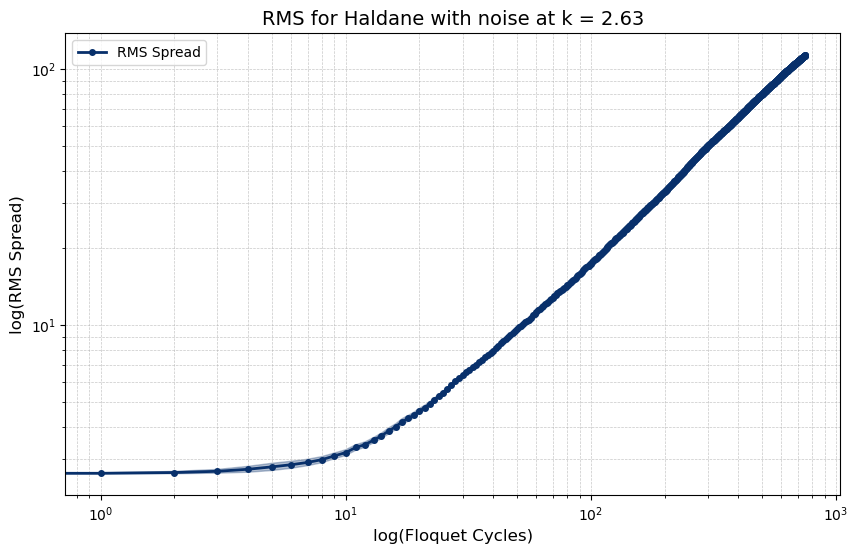

In [5]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array4)), array4, label="RMS Spread", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array4)), array4 - standard_error4, array4 + standard_error4, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 2.63', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

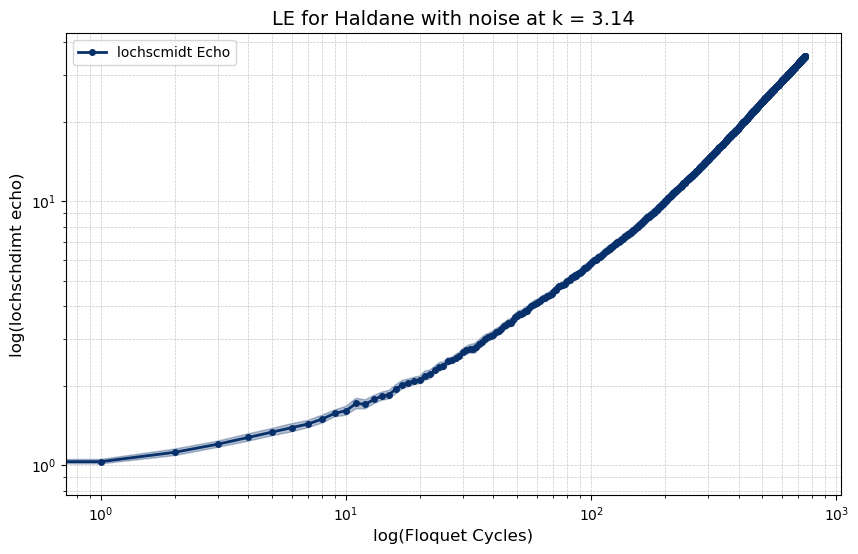

In [6]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array6)), array6, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array6)), array6 - standard_error6, array6 + standard_error6, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('LE for Haldane with noise at k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(lochschdimt echo)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_82174/2055955259.py:6: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


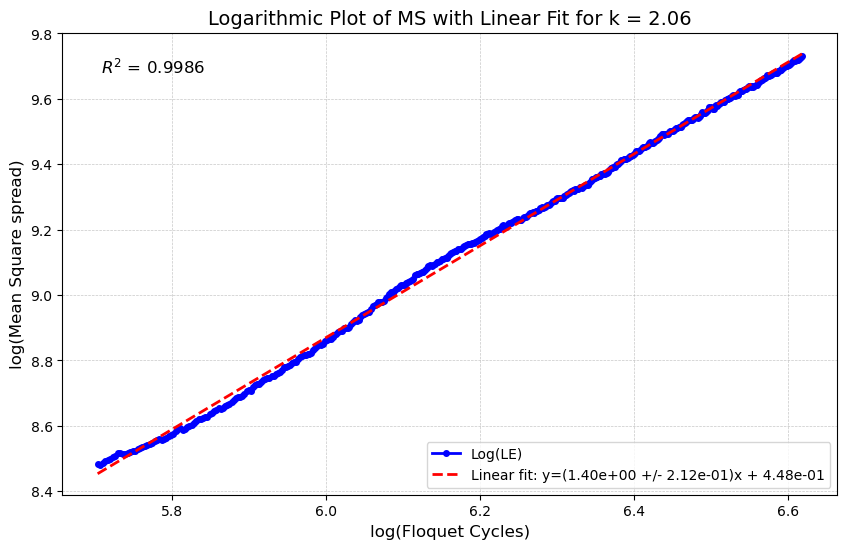

R^2 value of the linear fit: 0.9986
Linear fit parameters (0-150): slope = 1.40e+00, intercept = 4.48e-01


In [7]:
from scipy.optimize import curve_fit
LE_Val = array1
LE_Error = standard_error1
LE_Val = array1**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.06', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_82174/158768110.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


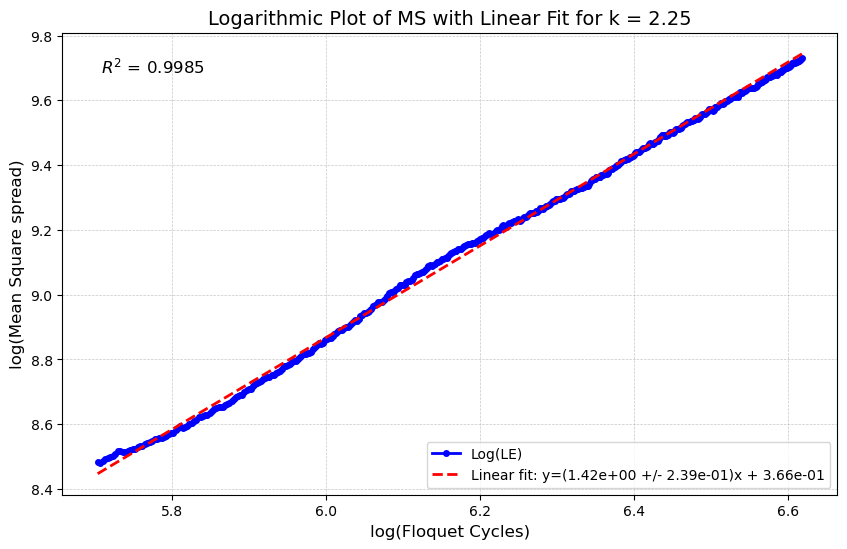

R^2 value of the linear fit: 0.9985
Linear fit parameters (0-150): slope = 1.42e+00, intercept = 3.66e-01


In [8]:
LE_Val = array2
LE_Error = standard_error2
LE_Val = array2**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')



def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.25', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_82174/3519483694.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


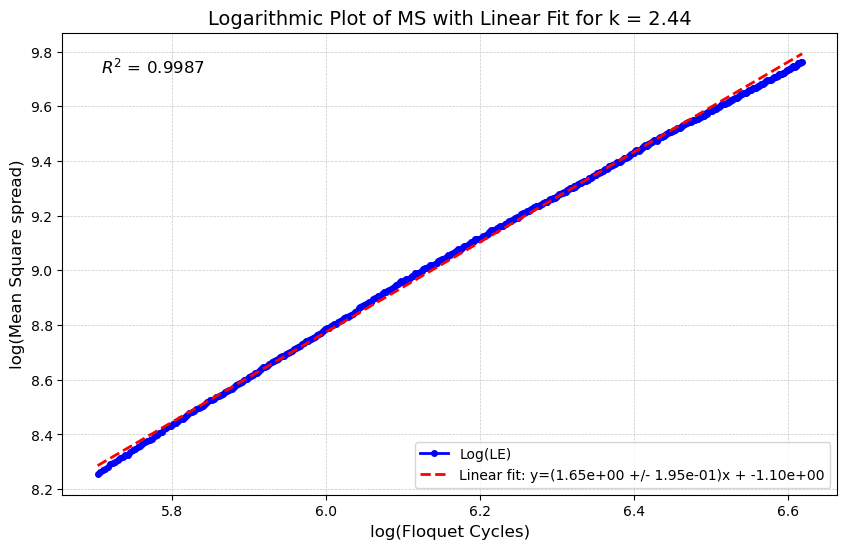

R^2 value of the linear fit: 0.9987
Linear fit parameters (0-150): slope = 1.65e+00, intercept = -1.10e+00


In [9]:
LE_Val = array3
LE_Error = standard_error3
LE_Val = array3**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.44', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_82174/249343218.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


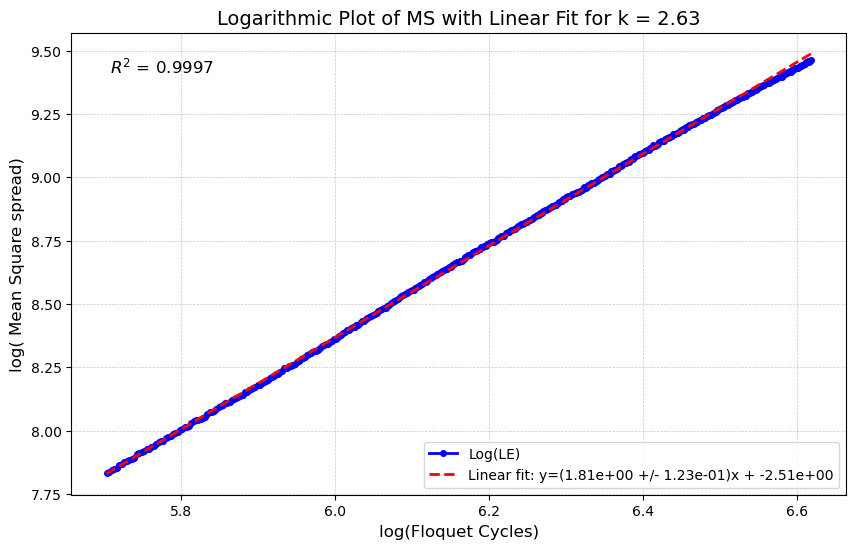

R^2 value of the linear fit: 0.9997
Linear fit parameters (0-150): slope = 1.81e+00, intercept = -2.51e+00


In [10]:
LE_Val = array4
LE_Error = standard_error4
LE_Val = array4**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of MS with Linear Fit for k = 2.63', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log( Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_18403/3407087630.py:4: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


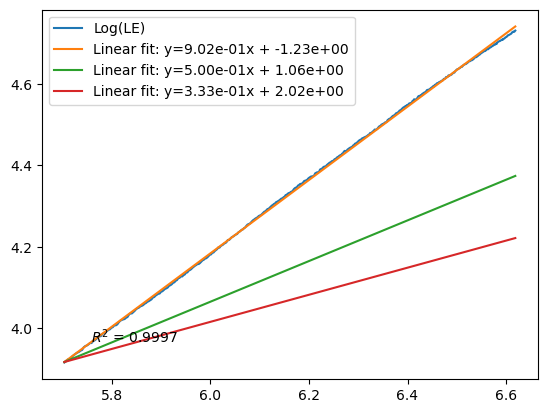

R^2 value of the linear fit: 0.9997
Linear fit parameters (0-150): slope = 9.02e-01, intercept = -1.23e+00


In [12]:
LE_Val = array4
LE_Error = standard_error4
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')



# Perform a linear fit from 0 to 300 time steps
slope_150, intercept_150 = np.polyfit(x_log_plot, LE_Val_plot, 1)
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = 0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = 0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)


# Plot the full log(LE) curve
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y={slope_150:.2e}x + {intercept_150:.2e}')
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}')
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}')
plt.legend()
plt.text(0.1, 0.1, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes)
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_18403/930534411.py:4: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


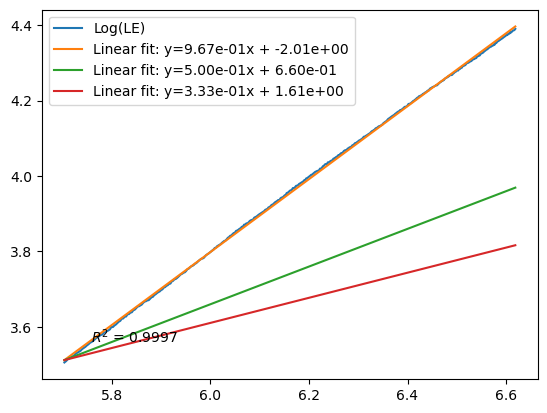

R^2 value of the linear fit: 0.9997
Linear fit parameters (0-150): slope = 9.67e-01, intercept = -2.01e+00


In [13]:
LE_Val = array5
LE_Error = standard_error5
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')



# Perform a linear fit from 0 to 300 time steps
slope_150, intercept_150 = np.polyfit(x_log_plot, LE_Val_plot, 1)
fitted_line_150 = slope_150 * x_log_plot + intercept_150



#slope of 0.5 line
slope_05 = 0.5
intercept_05 = fitted_line_150[0] - slope_05 * x_log_plot[0]
fitted_line_05 = slope_05 * x_log_plot  + intercept_05

#slope of 0.5 line
slope_03 = 0.333
intercept_03 = fitted_line_150[0] - slope_03 * x_log_plot[0]
fitted_line_03 = slope_03 * x_log_plot  + intercept_03

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)


# Plot the full log(LE) curve
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y={slope_150:.2e}x + {intercept_150:.2e}')
plt.plot(x_log_plot, fitted_line_05, label=f'Linear fit: y={slope_05:.2e}x + {intercept_05:.2e}')
plt.plot(x_log_plot, fitted_line_03, label=f'Linear fit: y={slope_03:.2e}x + {intercept_03:.2e}')
plt.legend()
plt.text(0.1, 0.1, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes)
plt.show()



# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot


dict_keys(['RMS_Hal_edge_state_750_1500_k_site_99.txt'])


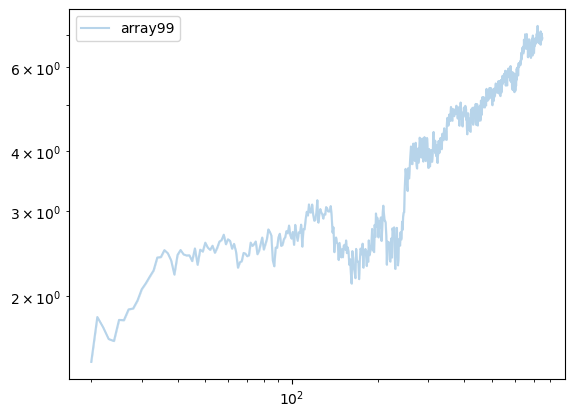

In [1]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_eigenfunc')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
# Loop through the directory to find and plot only the specific file for site 99
site = 99
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the specific pattern
    txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the array using the blue color scheme
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(20, len(array99)), array99[20:], label='array99', color=colors[0])
plt.fill_between(np.arange(20, len(array99)), array99[20:] - standard_error99[20:], array99[20:] + standard_error99[20:], alpha=0.3, color=colors[0])

plt.legend()
plt.show()


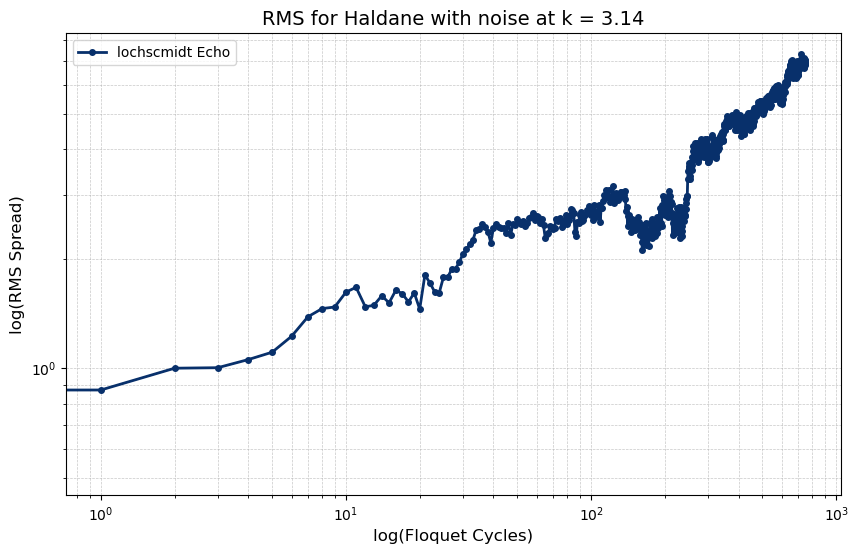

In [21]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array99)), array99, label="lochscmidt Echo", color=colors[1], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[1])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

dict_keys(['LE_Hal_edge_state_750_1500_k_site_99.txt'])


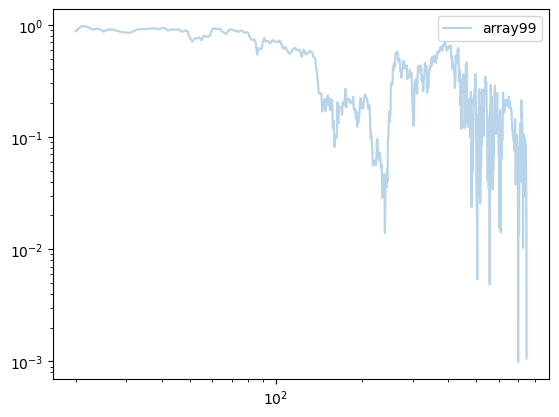

In [22]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_eigenfunc')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
# Loop through the directory to find and plot only the specific file for site 99
site = 99
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the specific pattern
    txt_files = [file for file in files if file.startswith(f'LE_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data



# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the array using the blue color scheme
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(20, len(array99)), array99[20:], label='array99', color=colors[0])
plt.fill_between(np.arange(20, len(array99)), array99[20:] - standard_error99[20:], array99[20:] + standard_error99[20:], alpha=0.3, color=colors[0])

plt.legend()
plt.show()


dict_keys(['RMS_Hal_edge_state_750_1500_k_site_99.txt'])
dict_keys(['b11_large', 'b14_large', 'b19_large', 'b22_large', 'b38_large', 'b44_large', 'b58_large', 'b59_large', 'b67_large', 'b75_large', 'b83_large', 'b88_large'])


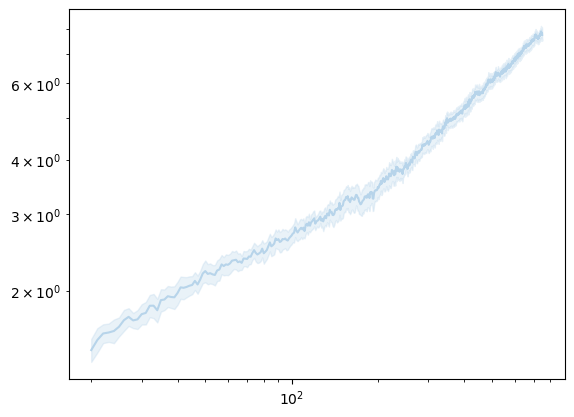

In [11]:
import os
import numpy as np
import sys
import os
import numpy as np
import numpy.linalg
import scipy as sp  
import matplotlib.pyplot as plt

# Define the path to the downloads folder
downloads_folder = os.path.expanduser('~/Desktop/Hal_1500_LE_RMS_eigenfunc')

# Initialize a dictionary to store the arrays
le_ana_arrays = {}

# Loop through the site numbers to generate arrays and standard errors
site = 99
# Walk through the directory
for root, dirs, files in os.walk(downloads_folder):
    # Filter out only the .txt files that match the pattern
    txt_files = [file for file in files if file.startswith(f'RMS_Hal_edge_state_750_1500_k_site_{site}') and file.endswith('.txt')]

    # Load each file and store it in the dictionary
    for txt_file in txt_files:
        file_path = os.path.join(root, txt_file)
        data = np.loadtxt(file_path)
        le_ana_arrays[txt_file] = data

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Initialize a dictionary to store the arrays from each directory
le_ana_arrays = {}

# Loop through directories b0 to b95
for i in range(96):
    dir_path = os.path.join(downloads_folder, f'b{i}')
    le_ana_large_path = os.path.join(dir_path, f'RMS_Hal_edge_state_750_1500_k_site_{site}.txt')
    
    if os.path.exists(le_ana_large_path):
        le_ana_large = np.loadtxt(le_ana_large_path)
        le_ana_arrays[f'b{i}_large'] = le_ana_large

# Print the keys of the dictionary to verify
print(le_ana_arrays.keys())

# Convert the dictionary values to a numpy array for easier manipulation
plot_data = np.array(list(le_ana_arrays.values()))

# Calculate the average and standard error
array99 = np.mean(plot_data, axis=0)
standard_error99 = np.std(plot_data, axis=0) / np.sqrt(plot_data.shape[0])

# Plot the arrays using the blue color schemes
colors = plt.cm.Blues(np.linspace(0.3, 1, 7))
plt.loglog(np.arange(20, len(array99)), array99[20:], label='array99', color=colors[0])
plt.fill_between(np.arange(20, len(array99)), array99[20:] - standard_error99[20:], array99[20:] + standard_error99[20:], alpha=0.3, color=colors[0])


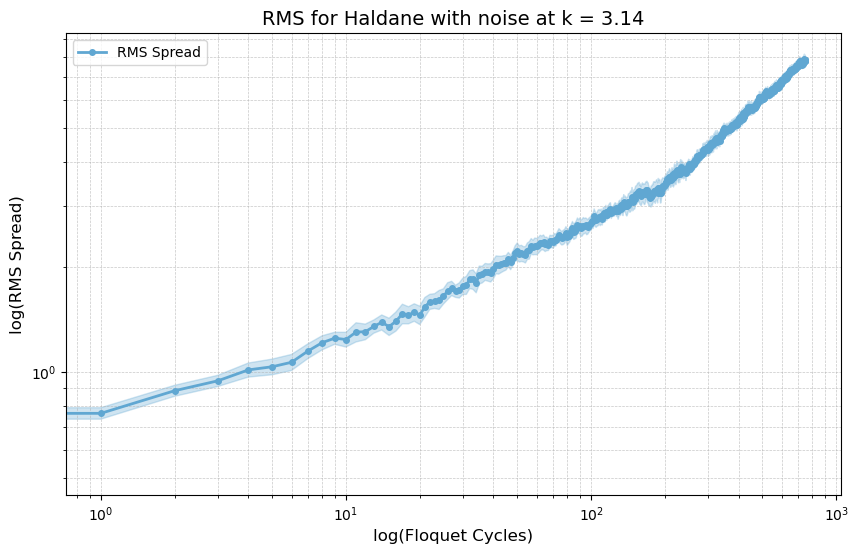

In [12]:
plt.figure(figsize=(10, 6))

# Plot the curve with enhanced styling
plt.loglog(np.arange(len(array99)), array99, label="RMS Spread", color=colors[2], linewidth=2, marker='o', markersize=4)
plt.fill_between(np.arange(len(array99)), array99 - standard_error99, array99 + standard_error99, alpha=0.3, color=colors[2])

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('RMS for Haldane with noise at k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(RMS Spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

/var/folders/4n/4y_rknps05l_pvrvh_0c3x540000gn/T/ipykernel_82174/1070775780.py:5: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(np.arange(len(LE_Val)))


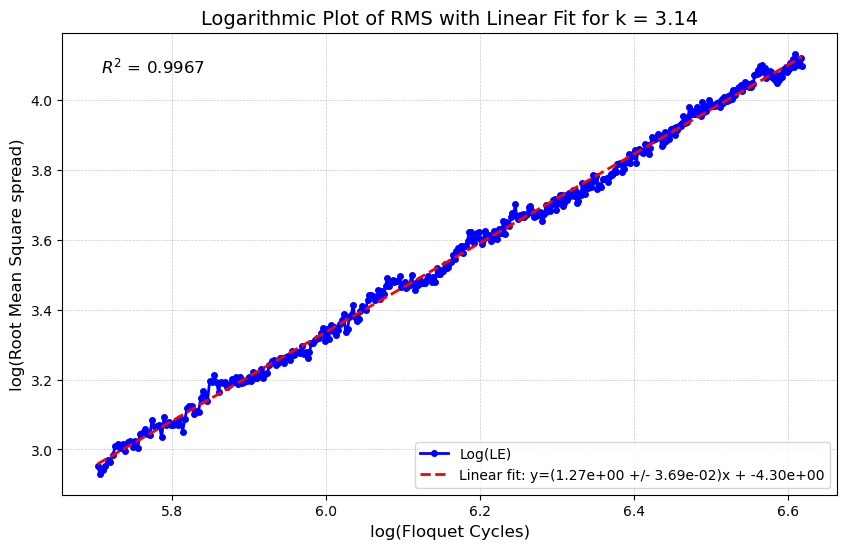

R^2 value of the linear fit: 0.9967
Linear fit parameters (0-150): slope = 1.27e+00, intercept = -4.30e+00


In [13]:
LE_Val = array99
LE_Error = standard_error99
LE_Val = array99**2
LE_Val_log = np.log(LE_Val)
x_log = np.log(np.arange(len(LE_Val)))
x_log_plot = x_log[300:]
LE_Val_plot = LE_Val_log[300:]
LE_Error_plot = LE_Error[300:]
n = len(LE_Val_plot)
#plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)')

def linear_f(x, slope, intercept):
    """Linear function for fitting."""
    return slope * x + intercept

# Perform a linear fit from 0 to 300 time steps
popt, pcov = curve_fit(linear_f, x_log_plot, LE_Val_plot, sigma = LE_Error_plot, absolute_sigma=True)
slope_150, intercept_150 = popt
cov = np.polyfit(x_log_plot, LE_Val_plot, 1, cov=True)[1]
slope_error_150 = np.sqrt(pcov[0, 0])
intercept_150_error = np.sqrt(pcov[1, 1])
# Calculate the fitted line for the linear fit
fitted_line_150 = slope_150 * x_log_plot + intercept_150

# Calculate the R^2 value
residuals = LE_Val_plot - fitted_line_150
ss_res = np.sum(residuals**2)
ss_tot = np.sum((LE_Val_plot - np.mean(LE_Val_plot))**2)
r_squared = 1 - (ss_res / ss_tot)

# Beautify the plot
plt.figure(figsize=(10, 6))
plt.plot(x_log_plot, LE_Val_plot, label='Log(LE)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(x_log_plot, fitted_line_150, label=f'Linear fit: y=({slope_150:.2e} +/- {slope_error_150:.2e})x + {intercept_150:.2e}', color='red', linestyle='--', linewidth=2)

# Add gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.title('Logarithmic Plot of RMS with Linear Fit for k = 3.14', fontsize=14)
plt.xlabel('log(Floquet Cycles)', fontsize=12)
plt.ylabel('log(Root Mean Square spread)', fontsize=12)

# Add legend
plt.legend(fontsize=10)

# Add the R^2 value to the plot
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.show()

# Report the R^2 value
print(f"R^2 value of the linear fit: {r_squared:.4f}")

# Report the fit for 0 to 150 time steps
print(f"Linear fit parameters (0-150): slope = {slope_150:.2e}, intercept = {intercept_150:.2e}")
# Add the R^2 value to the plot
# Highlight the slope on the plot
#plt.text(0.05, 0.90, f'Slope = {slope_150:.2e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

